In [432]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [433]:
mov_data= pd.read_csv('IMDb Movies India.csv',encoding='latin1')
mov_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [434]:
mov_data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [435]:
mov_data.drop('Name',axis=1,inplace=True)

In [436]:
mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...
15504,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [437]:
mov_data.dropna(inplace=True)
mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [438]:
mov_data.drop_duplicates(inplace=True)
mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [439]:
mov_data['Year'] = mov_data['Year'].str.extract(r'(\d+)').astype(int)
mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [440]:
len(mov_data['Actor 1'].unique())

1960

In [441]:
len(mov_data['Actor 2'].unique())

2321

In [442]:
len(mov_data['Actor 3'].unique())

2556

In [443]:
len(mov_data['Duration'].unique())

174

In [444]:
mov_data['Duration'] = mov_data['Duration'].str.replace('min', '').astype(int)
mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [445]:
mov_data['Votes'] = mov_data['Votes'].apply(lambda x: int(x.replace(',', '')))
mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [446]:
u_d=mov_data['Director'].unique()
len(u_d)

2431

In [447]:

mov_data['Dir-avg-rating'] = mov_data.groupby('Director')['Rating'].transform('mean')

mov_data['Dir-midean-rating'] = mov_data.groupby('Director')['Rating'].transform('median')

mov_data


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Dir-avg-rating,Dir-midean-rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,7.00
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,4.40
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.313333,5.20
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.383333,7.55
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.600000,5.60
...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.100000,6.10
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,7.250000,7.45
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.270000,6.45
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.25


In [448]:
mov_data['Act1-avg-rating'] = mov_data.groupby('Actor 1')['Rating'].transform('mean')

mov_data['Act1-midean-rating'] = mov_data.groupby('Actor 1')['Rating'].transform('median')

mov_data


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Dir-avg-rating,Dir-midean-rating,Act1-avg-rating,Act1-midean-rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,7.00,6.850000,6.85
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,4.40,5.420000,5.30
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.313333,5.20,4.788889,4.75
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.383333,7.55,5.435000,5.35
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.600000,5.60,5.600000,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.100000,6.10,6.725000,6.65
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,7.250000,7.45,4.157143,3.90
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.270000,6.45,6.307692,6.30
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.25,5.481707,5.30


In [449]:
mov_data['Act2-avg-rating'] = mov_data.groupby('Actor 2')['Rating'].transform('mean')

mov_data['Act2-midean-rating'] = mov_data.groupby('Actor 2')['Rating'].transform('median')

mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Dir-avg-rating,Dir-midean-rating,Act1-avg-rating,Act1-midean-rating,Act2-avg-rating,Act2-midean-rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,7.00,6.850000,6.85,7.000000,7.00
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,4.40,5.420000,5.30,4.400000,4.40
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.313333,5.20,4.788889,4.75,5.786667,5.60
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.383333,7.55,5.435000,5.35,6.933333,7.30
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.600000,5.60,5.600000,5.60,5.883333,5.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.100000,6.10,6.725000,6.65,6.100000,6.10
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,7.250000,7.45,4.157143,3.90,5.823077,5.90
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.270000,6.45,6.307692,6.30,5.800000,5.80
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.25,5.481707,5.30,4.640000,4.65


In [450]:
mov_data['Act3-avg-rating'] = mov_data.groupby('Actor 3')['Rating'].transform('mean')

mov_data['Act3-midean-rating'] = mov_data.groupby('Actor 3')['Rating'].transform('median')

mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Dir-avg-rating,Dir-midean-rating,Act1-avg-rating,Act1-midean-rating,Act2-avg-rating,Act2-midean-rating,Act3-avg-rating,Act3-midean-rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,7.00,6.850000,6.85,7.000000,7.00,7.000000,7.00
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,4.40,5.420000,5.30,4.400000,4.40,4.450000,4.45
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.313333,5.20,4.788889,4.75,5.786667,5.60,5.872727,6.10
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.383333,7.55,5.435000,5.35,6.933333,7.30,6.500000,6.65
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.600000,5.60,5.600000,5.60,5.883333,5.70,5.600000,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.100000,6.10,6.725000,6.65,6.100000,6.10,5.850000,5.85
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,7.250000,7.45,4.157143,3.90,5.823077,5.90,5.954545,6.20
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.270000,6.45,6.307692,6.30,5.800000,5.80,6.050000,6.30
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.25,5.481707,5.30,4.640000,4.65,5.737500,6.20


In [451]:
mov_data['Genre1'] = mov_data.Genre.str.split(',',expand=True)[0]
mov_data['Genre2'] = mov_data.Genre.str.split(',',expand=True)[1]
mov_data['Genre3'] = mov_data.Genre.str.split(',',expand=True)[2]
mov_data

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Dir-avg-rating,Dir-midean-rating,Act1-avg-rating,Act1-midean-rating,Act2-avg-rating,Act2-midean-rating,Act3-avg-rating,Act3-midean-rating,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,7.00,6.850000,6.85,7.000000,7.00,7.000000,7.00,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,4.40,5.420000,5.30,4.400000,4.40,4.450000,4.45,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.313333,5.20,4.788889,4.75,5.786667,5.60,5.872727,6.10,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.383333,7.55,5.435000,5.35,6.933333,7.30,6.500000,6.65,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.600000,5.60,5.600000,5.60,5.883333,5.70,5.600000,5.60,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.100000,6.10,6.725000,6.65,6.100000,6.10,5.850000,5.85,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,7.250000,7.45,4.157143,3.90,5.823077,5.90,5.954545,6.20,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.270000,6.45,6.307692,6.30,5.800000,5.80,6.050000,6.30,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.25,5.481707,5.30,4.640000,4.65,5.737500,6.20,Action,Drama,None


In [452]:
mov_data_transformed=mov_data.drop(["Genre","Director","Actor 1","Actor 2","Actor 3"],axis=1)
mov_data_transformed

,Year,Duration,Rating,Votes,Dir-avg-rating,Dir-midean-rating,Act1-avg-rating,Act1-midean-rating,Act2-avg-rating,Act2-midean-rating,Act3-avg-rating,Act3-midean-rating,Genre1,Genre2,Genre3
1,2019,109,7.0,8,7.000000,7.00,6.850000,6.85,7.000000,7.00,7.000000,7.00,Drama,None,None
3,2019,110,4.4,35,4.400000,4.40,5.420000,5.30,4.400000,4.40,4.450000,4.45,Comedy,Romance,None
5,1997,147,4.7,827,5.313333,5.20,4.788889,4.75,5.786667,5.60,5.872727,6.10,Comedy,Drama,Musical
6,2005,142,7.4,1086,7.383333,7.55,5.435000,5.35,6.933333,7.30,6.500000,6.65,Drama,Romance,War
8,2012,82,5.6,326,5.600000,5.60,5.600000,5.60,5.883333,5.70,5.600000,5.60,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,6.100000,6.10,6.725000,6.65,6.100000,6.10,5.850000,5.85,Drama,None,None
15494,2001,153,6.2,1496,7.250000,7.45,4.157143,3.90,5.823077,5.90,5.954545,6.20,Biography,Drama,History
15503,1989,125,5.8,44,6.270000,6.45,6.307692,6.30,5.800000,5.80,6.050000,6.30,Action,Crime,Drama
15505,1999,129,4.5,655,5.225000,5.25,5.481707,5.30,4.640000,4.65,5.737500,6.20,Action,Drama,None


In [453]:
mov_data_transformed.isna().sum()

Year                     0
Duration                 0
Rating                   0
Votes                    0
Dir-avg-rating           0
Dir-midean-rating        0
Act1-avg-rating          0
Act1-midean-rating       0
Act2-avg-rating          0
Act2-midean-rating       0
Act3-avg-rating          0
Act3-midean-rating       0
Genre1                   0
Genre2                1658
Genre3                3340
dtype: int64

In [454]:
mov_data_transformed['Genre2'] = mov_data_transformed['Genre2'].fillna(mov_data_transformed['Genre1'])
mov_data_transformed['Genre3'] = mov_data_transformed['Genre3'].fillna(mov_data_transformed['Genre2'])
mov_data_transformed

,Year,Duration,Rating,Votes,Dir-avg-rating,Dir-midean-rating,Act1-avg-rating,Act1-midean-rating,Act2-avg-rating,Act2-midean-rating,Act3-avg-rating,Act3-midean-rating,Genre1,Genre2,Genre3
1,2019,109,7.0,8,7.000000,7.00,6.850000,6.85,7.000000,7.00,7.000000,7.00,Drama,Drama,Drama
3,2019,110,4.4,35,4.400000,4.40,5.420000,5.30,4.400000,4.40,4.450000,4.45,Comedy,Romance,Romance
5,1997,147,4.7,827,5.313333,5.20,4.788889,4.75,5.786667,5.60,5.872727,6.10,Comedy,Drama,Musical
6,2005,142,7.4,1086,7.383333,7.55,5.435000,5.35,6.933333,7.30,6.500000,6.65,Drama,Romance,War
8,2012,82,5.6,326,5.600000,5.60,5.600000,5.60,5.883333,5.70,5.600000,5.60,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,6.100000,6.10,6.725000,6.65,6.100000,6.10,5.850000,5.85,Drama,Drama,Drama
15494,2001,153,6.2,1496,7.250000,7.45,4.157143,3.90,5.823077,5.90,5.954545,6.20,Biography,Drama,History
15503,1989,125,5.8,44,6.270000,6.45,6.307692,6.30,5.800000,5.80,6.050000,6.30,Action,Crime,Drama
15505,1999,129,4.5,655,5.225000,5.25,5.481707,5.30,4.640000,4.65,5.737500,6.20,Action,Drama,Drama


In [455]:
for col in ['Genre1', 'Genre2', 'Genre3']:
    le = LabelEncoder()
    mov_data_transformed[col] = le.fit_transform(mov_data_transformed[col])

mov_data_transformed

,Year,Duration,Rating,Votes,Dir-avg-rating,Dir-midean-rating,Act1-avg-rating,Act1-midean-rating,Act2-avg-rating,Act2-midean-rating,Act3-avg-rating,Act3-midean-rating,Genre1,Genre2,Genre3
1,2019,109,7.0,8,7.000000,7.00,6.850000,6.85,7.000000,7.00,7.000000,7.00,7,25,27
3,2019,110,4.4,35,4.400000,4.40,5.420000,5.30,4.400000,4.40,4.450000,4.45,4,13,14
5,1997,147,4.7,827,5.313333,5.20,4.788889,4.75,5.786667,5.60,5.872727,6.10,4,5,11
6,2005,142,7.4,1086,7.383333,7.55,5.435000,5.35,6.933333,7.30,6.500000,6.65,7,13,18
8,2012,82,5.6,326,5.600000,5.60,5.600000,5.60,5.883333,5.70,5.600000,5.60,11,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,6.100000,6.10,6.725000,6.65,6.100000,6.10,5.850000,5.85,7,25,27
15494,2001,153,6.2,1496,7.250000,7.45,4.157143,3.90,5.823077,5.90,5.954545,6.20,3,5,8
15503,1989,125,5.8,44,6.270000,6.45,6.307692,6.30,5.800000,5.80,6.050000,6.30,0,4,5
15505,1999,129,4.5,655,5.225000,5.25,5.481707,5.30,4.640000,4.65,5.737500,6.20,0,5,5


In [456]:
x=mov_data_transformed.drop("Rating",axis=1)
y=mov_data_transformed["Rating"]

In [457]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [458]:
x

array([[9.77777778e-01, 2.93333333e-01, 5.07260590e-06, ...,
        3.68421053e-01, 6.75675676e-01, 6.92307692e-01],
       [9.77777778e-01, 2.96666667e-01, 5.07260590e-05, ...,
        2.10526316e-01, 3.51351351e-01, 3.58974359e-01],
       [7.33333333e-01, 4.20000000e-01, 1.38989402e-03, ...,
        2.10526316e-01, 1.35135135e-01, 2.82051282e-01],
       ...,
       [6.44444444e-01, 3.46666667e-01, 6.59438767e-05, ...,
        0.00000000e+00, 1.08108108e-01, 1.28205128e-01],
       [7.55555556e-01, 3.60000000e-01, 1.09906461e-03, ...,
        0.00000000e+00, 1.35135135e-01, 1.28205128e-01],
       [7.44444444e-01, 3.63333333e-01, 2.53630295e-05, ...,
        0.00000000e+00, 1.35135135e-01, 1.28205128e-01]])

In [459]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [460]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [461]:
x_train

array([[9.22222222e-01, 3.43333333e-01, 4.90520990e-03, ...,
        2.10526316e-01, 5.94594595e-01, 6.15384615e-01],
       [6.66666667e-01, 4.03333333e-01, 2.65466375e-04, ...,
        0.00000000e+00, 1.35135135e-01, 1.28205128e-01],
       [7.22222222e-01, 4.80000000e-01, 1.04833855e-04, ...,
        3.68421053e-01, 6.75675676e-01, 6.92307692e-01],
       ...,
       [9.88888889e-01, 1.36666667e-01, 1.47105571e-04, ...,
        2.10526316e-01, 1.08108108e-01, 1.02564103e-01],
       [5.33333333e-01, 3.20000000e-01, 1.48796440e-04, ...,
        2.10526316e-01, 1.35135135e-01, 1.28205128e-01],
       [9.22222222e-01, 3.76666667e-01, 2.20320183e-03, ...,
        0.00000000e+00, 2.43243243e-01, 3.84615385e-01]])

In [462]:
y_train

14241    4.9
15303    4.6
12415    7.3
15449    7.1
3392     6.7
        ... 
8114     6.2
3127     5.3
12970    8.5
9264     6.5
3249     3.1
Name: Rating, Length: 5093, dtype: float64

In [463]:
x_test

array([[2.33333333e-01, 4.80000000e-01, 1.85995550e-04, ...,
        2.63157895e-01, 4.32432432e-01, 4.35897436e-01],
       [9.11111111e-01, 3.70000000e-01, 4.62486389e-02, ...,
        3.68421053e-01, 2.70270270e-01, 2.82051282e-01],
       [8.00000000e-01, 3.80000000e-01, 3.71991099e-05, ...,
        3.68421053e-01, 6.75675676e-01, 6.92307692e-01],
       ...,
       [5.55555556e-01, 4.86666667e-01, 1.81937465e-03, ...,
        3.68421053e-01, 2.97297297e-01, 3.58974359e-01],
       [9.22222222e-01, 2.63333333e-01, 6.01949233e-03, ...,
        3.68421053e-01, 6.75675676e-01, 6.92307692e-01],
       [9.55555556e-01, 2.60000000e-01, 3.38173727e-06, ...,
        3.68421053e-01, 6.75675676e-01, 6.92307692e-01]])

In [464]:
y_test

6267     7.2
485      7.0
5915     1.7
14201    5.7
12632    7.6
        ... 
12374    7.3
1788     7.2
4401     7.5
8895     7.2
4109     4.0
Name: Rating, Length: 566, dtype: float64

In [465]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

In [466]:
y_pred_lin = lin_reg.predict(x_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

In [467]:
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lin:.4f}")
print(f"R^2 Score: {r2_lin:.4f}")

Linear Regression Results:
Mean Squared Error: 0.4308
R^2 Score: 0.7826


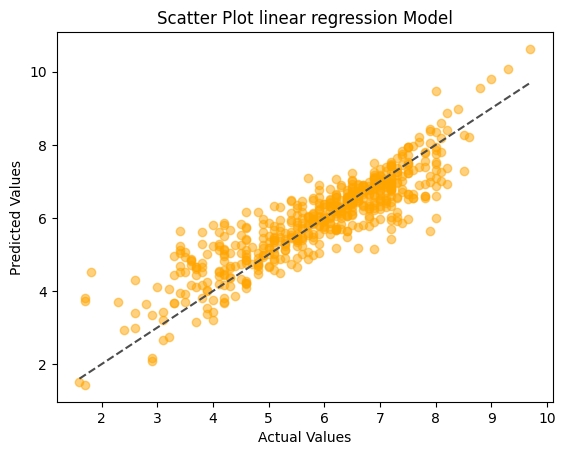

In [468]:
plt.scatter(y_test, y_pred_lin, alpha=0.5,color="orange")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot linear regression Model')
plt.show()

In [469]:
ridge_reg = Ridge(alpha=2.8) 
ridge_reg.fit(x_train, y_train)

Ridge(alpha=2.8)

In [470]:
y_pred_ridge = ridge_reg.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [471]:
print("\nRidge Regression Results:")
print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R^2 Score: {r2_ridge:.4f}")


Ridge Regression Results:
Mean Squared Error: 0.4380
R^2 Score: 0.7789


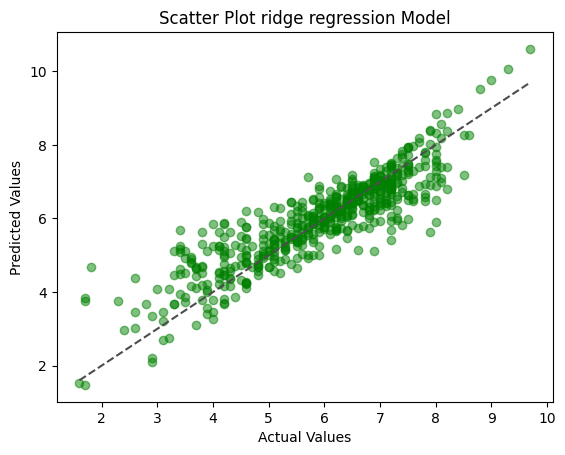

In [472]:
plt.scatter(y_test, y_pred_ridge, alpha=0.5,color="green")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot ridge regression Model')
plt.show()

In [473]:
lasso_reg = Lasso(alpha=.0001) 
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.0001)

In [474]:
y_pred_lasso = lasso_reg.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [475]:
print("\nLasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso:.4f}")
print(f"R^2 Score: {r2_lasso:.4f}")


Lasso Regression Results:
Mean Squared Error: 0.4313
R^2 Score: 0.7823


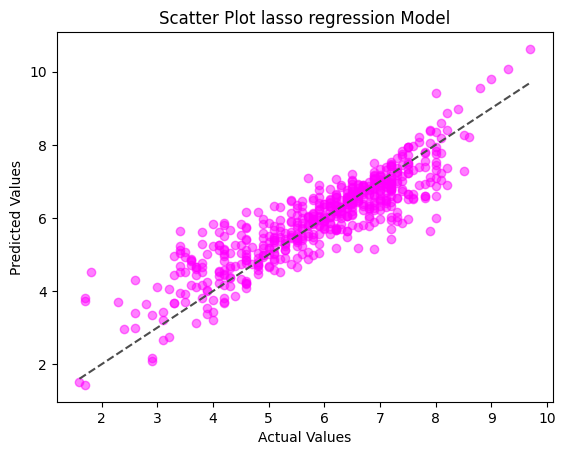

In [476]:
plt.scatter(y_test, y_pred_lasso, alpha=0.5,color="magenta")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot lasso regression Model')
plt.show()

In [477]:
elastic_net_reg = ElasticNet(alpha=.0001, l1_ratio=0.1)
elastic_net_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0001, l1_ratio=0.1)

In [478]:
y_pred_elastic_net = elastic_net_reg.predict(x_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

In [479]:
print("\nElastic Net Regression Results:")
print(f"Mean Squared Error: {mse_elastic_net:.4f}")
print(f"R^2 Score: {r2_elastic_net:.4f}")


Elastic Net Regression Results:
Mean Squared Error: 0.4325
R^2 Score: 0.7817


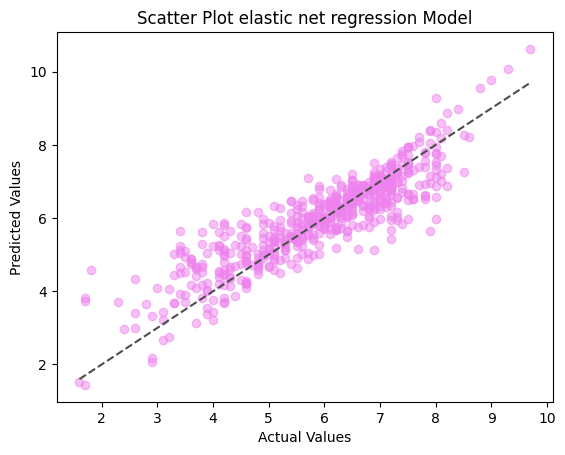

In [480]:
plt.scatter(y_test, y_pred_elastic_net, alpha=0.5,color="violet")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--', c='.3')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot elastic net regression Model')
plt.show()